# Relationship and Market position clustering

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("omya/sources/preprocessed_data.csv")
df.head(3)

,customer,sales_qty_2021,sales_qty_2022,sales_qty_2023,sales_qty_2024,net_sales_2021,net_sales_2022,net_sales_2023,net_sales_2024,p2_2021,p2_2022,p2_2023,p2_2024,qty_2021_score,qty_2022_score,qty_2023_score,qty_2024_score,sales_2021_score,sales_2022_score,sales_2023_score,sales_2024_score,p2_2021_score,p2_2022_score,p2_2023_score,p2_2024_score,qty_2021_score_desc,qty_2022_score_desc,qty_2023_score_desc,qty_2024_score_desc,sales_2021_score_desc,sales_2022_score_desc,sales_2023_score_desc,sales_2024_score_desc,p2_2021_score_desc,p2_2022_score_desc,p2_2023_score_desc,p2_2024_score_desc,market_position_score,relationship_score,market_position_desc,relationship_desc,material_portfolio,material_portfolio_desc,brand_portfolio,brand_portfolio_desc,product_type_portfolio,product_type_portfolio_desc,material_portfolio_score,brand_portfolio_score,product_type_portfolio_score,material_portfolio_score_desc,brand_portfolio_score_desc,product_type_portfolio_score_desc,feature_tag_null,feature_tag_q1,feature_tag_q2,feature_tag_q3,feature_tag_q4,feature_tag_null_score,feature_tag_q1_score,feature_tag_q2_score,feature_tag_q3_score,feature_tag_q4_score
0,Customer_1005,28682071,32079526,31453752,26429101,1.695876e+09,1.833924e+09,1.900422e+09,1.595169e+09,9.462729e+08,8.847213e+08,1.072850e+09,7.123357e+08,3,4,4,2,3.0,4.0,4.0,2.0,4.0,3.0,5.0,1.0,Medium,High,High,Low,Medium,High,High,Low,High,Medium,Strategic,Neglectable,3.0,5.0,"Innovative & Faster Growing than Market, Niche...",Partnership,4,"MAT000810, MAT002520, MAT000318, MAT000834",4,"Brand_2805, Brand_5892, Brand_3658, Brand_5729",4,"Product_Type_1283, Product_Type_317, Product_T...",2,2,2,several,several,several,40,13,16,10,15,1,3,1,2,1
1,Customer_1011,26662722,26804515,28793437,24591574,1.362151e+09,1.531981e+09,1.890697e+09,1.581387e+09,5.740576e+08,7.805375e+08,1.046884e+09,7.476680e+08,2,2,3,1,1.0,2.0,4.0,2.0,1.0,2.0,4.0,2.0,Low,Low,Medium,Neglectable,Neglectable,Low,High,Low,Neglectable,Low,High,Low,2.5,3.3,"Faster Growing than Market, Market Follower","Transactional, Pure Business, Partnership",4,"MAT000256, MAT000812, MAT001174, MAT000449",4,"Brand_396, Brand_6463, Brand_707, Brand_1399",4,"Product_Type_676, Product_Type_1252, Product_T...",2,2,2,several,several,several,46,13,16,12,9,2,3,1,3,1
2,Customer_1023,18573979,25156206,26389512,29153877,1.089888e+09,1.478579e+09,1.669236e+09,1.651936e+09,5.051393e+08,8.404226e+08,6.137710e+08,8.069199e+08,1,2,2,3,1.0,2.0,3.0,2.0,1.0,3.0,1.0,2.0,Neglectable,Low,Low,Medium,Neglectable,Low,Medium,Low,Neglectable,Medium,Neglectable,Low,1.0,3.0,Niche Player,Pure Business,4,"MAT001921, MAT002068, MAT002926, MAT001675",4,"Brand_7539, Brand_7706, Brand_2936, Brand_5802",4,"Product_Type_649, Product_Type_776, Product_Ty...",2,2,2,several,several,several,45,17,10,9,8,2,1,2,1,1


### Descripcion de df de procesamiento

* Customer = linea de credito de una empresa
* qty = volumen comprado anual
* sales = venta anual a una linea de credito
* qty/sales score = calificacion de adquisicion segun distribucion en quintiles (percentiles .2,.4,.6,.8)
* material_portfolio = recuento de materiales adquiridos
* material_portfolio_desc = materiales
* brand_portfolio = recuento de lineas de producto adquiridas
* brand_portfolio_desc = lineas de producto
* product_type_portfolio = recuento de productos adquiridos
* product_type_desc = productos
* material/brand/product_type score = calificacion de la linea de credito por adquisicion
* material/brand/product_type score desc = descripcion de calificacion
    * 'A couple or one': 1 ó 2
    * 'several': 3 ó 4
    * 'A few': 5 ó 6
    * 'Many': 7 ú 8
    * 'Extended range': 9 ó más
* feature_tag = recuento de etiquetas sobre materiales vendidos
* feature_tag_score = calificacion de adquisicion segun distribucion en quintiles (percentiles .2,.4,.6,.8)
* market_position/relationship = descripcion de lineas de credito
* market_position/relationship score = calificacion segun importancia
    * 1: Niche Player /  Opportunistic
    * 2: Market Follower / Transactional
    * 3: Faster Growing than Market / Pure Business
    * 4: Innovative / Advanced Business Ties
    * 5: Innovative & Faster Growing than Market / Partnership

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 63 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer                           926 non-null    object 
 1   sales_qty_2021                     926 non-null    int64  
 2   sales_qty_2022                     926 non-null    int64  
 3   sales_qty_2023                     926 non-null    int64  
 4   sales_qty_2024                     926 non-null    int64  
 5   net_sales_2021                     926 non-null    float64
 6   net_sales_2022                     926 non-null    float64
 7   net_sales_2023                     926 non-null    float64
 8   net_sales_2024                     926 non-null    float64
 9   p2_2021                            926 non-null    float64
 10  p2_2022                            926 non-null    float64
 11  p2_2023                            926 non-null    float64

In [4]:
# consideracion: existen martek_pos de una sola etiqueta y de varias etiquetas (ambiguos), lo mismo pasa con relationship

# etiquetas de distribucion de ventas y cantidades vendidas
tag_dist_list = ['Neglectable', 'Low', 'Medium', 'High', 'Strategic']
# etiquetas de portafolio (material, brand, product type)
tag_portf_list = ['A couple or one', 'several', 'A few', 'Many', 'Extended range']
# etiquetas de posicionamiento de mercado (mkt_position)
mkt_tag = ['Niche Player', 'Market Follower', 'Faster Growing than Market', 'Innovative', 'Innovative & Faster Growing than Market']
# etiquetas de relacion cliente-empresa (relationship)
rel_tag = ['Opportunistic', 'Transactional', 'Pure Business', 'Advanced Business Ties', 'Partnership']


print(f"cantidad de customers: {len(df['customer'].unique())} customers con relationship definido: {len(df[df['relationship_desc'].isin(rel_tag)])} customer con mkt_pos definido: {len(df[df['market_position_desc'].isin(mkt_tag)])}")
print(f"customers mkt_pos por re-etiquetar: {len(df['customer'].unique()) - len(df[df['market_position_desc'].isin(mkt_tag)])}")
print(f"customers relationship por re-etiquetar: {len(df['customer'].unique()) - len(df[df['relationship_desc'].isin(rel_tag)])}")

cantidad de customers: 926 customers con relationship definido: 336 customer con mkt_pos definido: 342
customers mkt_pos por re-etiquetar: 584
customers relationship por re-etiquetar: 590


In [5]:
# etiquetas ambiguas contiguas
mkt_tag_amb = ['Niche Player, Market Follower',
               'Market Follower, Faster Growing than Market',
               'Faster Growing than Market, Innovative',
               'Innovative, Innovative & Faster Growing than Market']
rel_tag_amb = ['Opportunistic, Transactional',
               'Transactional, Pure Business',
               'Pure Business, Advanced Business Ties',
               'Advanced Business Ties, Partnership']

In [6]:
print(f"customers con relationship de transicion: {len(df[df['relationship_desc'].isin(rel_tag_amb)])} customer con mkt_pos de transicion: {len(df[df['market_position_desc'].isin(mkt_tag_amb)])}")

customers con relationship de transicion: 82 customer con mkt_pos de transicion: 81


In [7]:
'p2_2021_score', 'p2_2022_score', 'p2_2023_score', 'p2_2024_score'
df.columns

Index(['customer', 'sales_qty_2021', 'sales_qty_2022', 'sales_qty_2023',
       'sales_qty_2024', 'net_sales_2021', 'net_sales_2022', 'net_sales_2023',
       'net_sales_2024', 'p2_2021', 'p2_2022', 'p2_2023', 'p2_2024',
       'qty_2021_score', 'qty_2022_score', 'qty_2023_score', 'qty_2024_score',
       'sales_2021_score', 'sales_2022_score', 'sales_2023_score',
       'sales_2024_score', 'p2_2021_score', 'p2_2022_score', 'p2_2023_score',
       'p2_2024_score', 'qty_2021_score_desc', 'qty_2022_score_desc',
       'qty_2023_score_desc', 'qty_2024_score_desc', 'sales_2021_score_desc',
       'sales_2022_score_desc', 'sales_2023_score_desc',
       'sales_2024_score_desc', 'p2_2021_score_desc', 'p2_2022_score_desc',
       'p2_2023_score_desc', 'p2_2024_score_desc', 'market_position_score',
       'relationship_score', 'market_position_desc', 'relationship_desc',
       'material_portfolio', 'material_portfolio_desc', 'brand_portfolio',
       'brand_portfolio_desc', 'product_type_port

### Consideraciones previas a la seleccion y entrenamiento de modelos

* existen 336 customers con una relacion clara con la empresa, mientras que hay 342 customers claramente identificados en su posicionamiento de mercado
* existen 82 y 81 customers con etiquetas contiguas, relationship y mk_pos respectivamente

**Seleccion de datos de entrenamiento**
* por la naturaleza de los datos, se prueba lo siguiente:
    * relationship: a 336 customer (75.6%) se agregan 82 (24.4%)
    * mkt_pos: 342 customer (76.3%) se agregan 81 (23.7%) correspondientes a los ambiguos por etiquetas adyacentes
    * primero se sacaran resultados de relationship, despues de marketing_pos

In [8]:
# sns.pairplot(df)

## Clustering

Primero se trabaja con el target = relationship_score
* se asume que la empresa tiene mayor informacion de la relacion con sus customers/key_accounts que de market_position (naturaleza mas exogena)

Desde relationship_score, se trabaja clustering de market_position

In [9]:
# modelos de clustering
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, OPTICS, cluster_optics_dbscan
# modelo de referencia para DBSCAN y Affinity Propagation
from sklearn.neighbors import NearestNeighbors
# metricas
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [10]:
# listado de columnas descriptivas
desc_list = ['customer', 'qty_2021_score_desc', 'qty_2022_score_desc', 'qty_2023_score_desc', 'qty_2024_score_desc', 
             'sales_2021_score_desc', 'sales_2022_score_desc', 'sales_2023_score_desc', 'sales_2024_score_desc',
             'material_portfolio',
             'material_portfolio_desc', 'brand_portfolio', 'brand_portfolio_desc', 'product_type_portfolio', 'product_type_portfolio_desc',
             'material_portfolio_score_desc', 'brand_portfolio_score_desc', 'product_type_portfolio_score_desc', 'feature_tag_null',
             'feature_tag_q1', 'feature_tag_q2', 'feature_tag_q3', 'feature_tag_q4','market_position_desc', 'relationship_desc']

In [11]:
# listado de etiquetas que no necesitan de clustering

rel_tag_no_clustering = ['Opportunistic', 'Transactional', 'Pure Business', 'Advanced Business Ties', 'Partnership',
                      'Opportunistic, Transactional','Transactional, Pure Business','Pure Business, Advanced Business Ties',
                      'Advanced Business Ties, Partnership']
mkt_tag_no_clustering = ['Niche Player', 'Market Follower', 'Faster Growing than Market', 'Innovative', 'Innovative & Faster Growing than Market',
                      'Niche Player, Market Follower', 'Market Follower, Faster Growing than Market',
                      'Faster Growing than Market, Innovative', 'Innovative, Innovative & Faster Growing than Market']

### Preprocesamiento de Relationship df 

In [12]:
# lista de columnas de scores por customer para clustering
# , 'market_position_score'
r_score_list = ['qty_2021_score', 'qty_2022_score', 'qty_2023_score', 'qty_2024_score',
                'sales_2021_score', 'sales_2022_score','sales_2023_score', 'sales_2024_score',
                'p2_2021_score', 'p2_2022_score', 'p2_2023_score', 'p2_2024_score',
                'material_portfolio_score', 'brand_portfolio_score','product_type_portfolio_score',
                'feature_tag_null_score','feature_tag_q1_score', 'feature_tag_q2_score', 'feature_tag_q3_score',
                'feature_tag_q4_score']

In [13]:
# preprocesamiento de datos
df['relationship_score'] = df['relationship_score'].apply(np.ceil)

# set de datos para clustering
X = df[df['relationship_desc'].isin(rel_tag_no_clustering)==False][r_score_list].to_numpy()
y = df[df['relationship_desc'].isin(rel_tag_no_clustering)==False]['relationship_score'].to_numpy()

In [14]:
l_rel_customer = [v for v in df[df['relationship_desc'].isin(rel_tag_no_clustering)==False]['customer'].values]
l_rel_desc = [v for v in df[df['relationship_desc'].isin(rel_tag_no_clustering)==False]['relationship_desc'].values]

### KN Means model on Relationship

In [15]:
# entrena modelo para relationship
# se usan 5 rel_clusters directamente
kmeans_r = KMeans(n_clusters = 5)
kmeans_r.fit(X)

rel_labels_m = kmeans_r.labels_
rel_centers_m = kmeans_r.cluster_centers_

rel_model_class  = pd.DataFrame(data = rel_labels_m, columns=['rel_clusters'])
rel_model_class['y__old_mean_scores'] = pd.Series(y)
rel_model_class['customer'] = l_rel_customer
rel_model_class['relationship_desc'] = l_rel_desc

# El modelo "cambio" el orden de las etiquetas, con esta linea cambio al orden correcto
rel_model_class['rel_clusters'] = rel_model_class['rel_clusters'].map({0:5, 1:2, 2:1, 3:2, 4:3, 5:4, 6:5})
rel_model_class['results'] = [True if y == (c) else False for y, c in zip(rel_model_class['y__old_mean_scores'], rel_model_class["rel_clusters"])]

# resultados con relationship_desc y customer
rel_model_class

c:\Users\fefys\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\fefys\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,rel_clusters,y__old_mean_scores,customer,relationship_desc,results
0,2,4.0,Customer_1011,"Transactional, Pure Business, Partnership",False
1,2,4.0,Customer_1039,"Advanced Business Ties, Pure Business",False
2,5,2.0,Customer_1056,"Transactional, Opportunistic",False
3,2,3.0,Customer_1061,"Advanced Business Ties, Transactional",False
4,1,4.0,Customer_1079,"Advanced Business Ties, Pure Business",False
...,...,...,...,...,...
503,2,3.0,Customer_934,"Advanced Business Ties, Opportunistic",False
504,1,2.0,Customer_966,"Opportunistic, Pure Business",False
505,3,3.0,Customer_969,"Advanced Business Ties, Transactional",True
506,3,2.0,Customer_97,"Transactional, Opportunistic, Pure Business",False


In [16]:
# se consideran la cantidad de falsos de manera positiva, el modelo selecciona en base a los atributos
# los resultados son complementarios al procesamiento anterior de medias de calificacion
rel_model_class['results'].value_counts()

results
False    422
True      86
Name: count, dtype: int64

**Nuevos scores en tags ambiguos de relationship**

Se decide promediar los scores basados unicamente en las etiquetas de relationship (previos) con los resultados del modelo de clustering (actuales) debido a la informacion que entregan las mismas etiquetas en conjunto por cada customer.

In [17]:
# se promedian scores con resultados de knmeans
rel_n_scores = []
for s in rel_model_class[['rel_clusters','y__old_mean_scores']].values:
    rel_n_scores.append(np.mean(s))

rel_model_class['relationship_n_score'] = pd.Series(np.round(rel_n_scores, decimals =0))
rel_model_class['relationship_score'] = rel_model_class['relationship_n_score']
rel_model_class.drop(['rel_clusters','y__old_mean_scores','relationship_n_score', 'relationship_desc', 'results'], axis=1, inplace=True)
rel_model_class.head(3)


,customer,relationship_score
0,Customer_1011,3.0
1,Customer_1039,3.0
2,Customer_1056,4.0


In [18]:
rel_no_clust = df[df['relationship_desc'].isin(rel_tag_no_clustering)][['customer', 'relationship_score']].copy()
rel_subset = pd.concat([rel_model_class, rel_no_clust])

df.drop('relationship_score', axis=1, inplace=True)
df = pd.merge(df, rel_subset, how='inner', on='customer')
#df.head(5)

### Preprocesamiento de Marketing_position df

In [19]:
# lista de columnas de scores por customer para clustering
m_score_list = ['qty_2021_score', 'qty_2022_score', 'qty_2023_score','qty_2024_score',
                'sales_2021_score', 'sales_2022_score','sales_2023_score', 'sales_2024_score',
                'p2_2021_score', 'p2_2022_score', 'p2_2023_score', 'p2_2024_score',
                'material_portfolio_score', 'brand_portfolio_score','product_type_portfolio_score',
                'feature_tag_null_score','feature_tag_q1_score', 'feature_tag_q2_score', 'feature_tag_q3_score',
                'feature_tag_q4_score', 'relationship_score']

In [20]:
# preprocesamiento de datos
df['market_position_score'] = df['market_position_score'].apply(np.ceil)

# set de datos para clustering
X = df[df['market_position_desc'].isin(mkt_tag_no_clustering)==False][m_score_list].to_numpy()
y = df[df['market_position_desc'].isin(mkt_tag_no_clustering)==False]['market_position_score'].to_numpy()

In [21]:
# lista de customers y descripciones de mkt_pos para mas informacion post-clustering
l_mkt_customer = [v for v in df[df['market_position_desc'].isin(mkt_tag_no_clustering)==False]['customer'].values]
l_mkt_desc = [v for v in df[df['market_position_desc'].isin(mkt_tag_no_clustering)==False]['market_position_desc'].values]

#### KN Means Marketing Position

In [22]:
# entrena modelo para marketing_position
# se usan 5 mkt_clusters directamente
kmeans_m = KMeans(n_clusters = 5, verbose=True, algorithm='elkan')
kmeans_m.fit(X)

mkt_labels_m = kmeans_m.labels_
mkt_centers_m = kmeans_m.cluster_centers_

mkt_model_knmean  = pd.DataFrame(data = mkt_labels_m, columns=['mkt_clusters'])
mkt_model_knmean['y__old_mean_scores'] = pd.Series(y)
mkt_model_knmean['customer'] = l_mkt_customer
mkt_model_knmean['market_position_desc'] = l_mkt_desc

# El modelo "cambio" el orden de las etiquetas, con esta linea cambio al orden correcto
mkt_model_knmean['mkt_clusters'] = mkt_model_knmean['mkt_clusters'].map({0:5, 1:2, 2:1, 3:2, 4:3, 5:4, 6:5})
mkt_model_knmean['results'] = [True if y == (c) else False for y, c in zip(mkt_model_knmean['y__old_mean_scores'], mkt_model_knmean["mkt_clusters"])]

# resultados con mktationship_desc y customer
print(f"Inercia= {kmeans_m.inertia_}")
mkt_model_knmean

c:\Users\fefys\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 11723.0
Iteration 1, inertia 7078.9850352946505
Iteration 2, inertia 6972.720993334036
Iteration 3, inertia 6832.114506227121
Iteration 4, inertia 6649.435450620209
Iteration 5, inertia 6539.439035449892
Iteration 6, inertia 6515.859471433493
Iteration 7, inertia 6511.3447599415495
Iteration 8, inertia 6503.9072412384885
Iteration 9, inertia 6497.706115924189
Iteration 10, inertia 6483.765091154018
Iteration 11, inertia 6463.153525310147
Iteration 12, inertia 6435.649858098275
Iteration 13, inertia 6408.735880400452
Iteration 14, inertia 6389.69963480078
Iteration 15, inertia 6371.0292955839905
Iteration 16, inertia 6363.562730783773
Iteration 17, inertia 6354.566822794484
Iteration 18, inertia 6338.5579619024375
Iteration 19, inertia 6319.448998935271
Iteration 20, inertia 6306.3638403220575
Iteration 21, inertia 6297.0360987950535
Iteration 22, inertia 6286.57726304582
Iteration 23, inertia 6284.608670299886
Iteration 24, inertia 6283.8892

,mkt_clusters,y__old_mean_scores,customer,market_position_desc,results
0,2,3.0,Customer_1005,"Innovative & Faster Growing than Market, Niche...",False
1,3,3.0,Customer_1011,"Faster Growing than Market, Market Follower",True
2,3,2.0,Customer_1039,"Faster Growing than Market, Niche Player",False
3,5,3.0,Customer_1056,"Market Follower, Innovative",False
4,3,3.0,Customer_1061,"Niche Player, Innovative",True
...,...,...,...,...,...
498,1,2.0,Customer_934,"Faster Growing than Market, Niche Player",False
499,2,3.0,Customer_946,"Market Follower, Niche Player, Innovative",False
500,2,2.0,Customer_966,"Market Follower, Niche Player",True
501,2,3.0,Customer_969,"Niche Player, Innovative & Faster Growing than...",False


In [23]:
# el modelo muestra una casi completa reclasificacion de los customers
# los resultados no distan demasiado de los scores originales
# los nuevos resultados clarifican el posicionamiento de mercado de los customers ambiguos acorde a sus etiquetas
mkt_model_knmean['results'].value_counts()

results
False    404
True      99
Name: count, dtype: int64

In [24]:
(mkt_model_knmean['mkt_clusters'] - mkt_model_knmean['y__old_mean_scores']).value_counts()

-2.0    129
-1.0    126
 0.0     99
 1.0     62
-3.0     41
 2.0     25
 3.0     19
-4.0      2
Name: count, dtype: int64

In [25]:
mkt_model_knmean[mkt_model_knmean['mkt_clusters']==5][mkt_model_knmean['y__old_mean_scores']<=3]

C:\Users\fefys\AppData\Local\Temp\ipykernel_4284\3980867262.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mkt_model_knmean[mkt_model_knmean['mkt_clusters']==5][mkt_model_knmean['y__old_mean_scores']<=3]


,mkt_clusters,y__old_mean_scores,customer,market_position_desc,results
3,5,3.0,Customer_1056,"Market Follower, Innovative",False
6,5,3.0,Customer_1106,"Innovative & Faster Growing than Market, Niche...",False
7,5,3.0,Customer_1113,"Innovative, Niche Player",False
22,5,2.0,Customer_1343,"Faster Growing than Market, Niche Player",False
26,5,2.0,Customer_1466,"Market Follower, Niche Player",False
33,5,2.0,Customer_1584,"Faster Growing than Market, Niche Player",False
49,5,2.0,Customer_1762,"Faster Growing than Market, Niche Player",False
51,5,3.0,Customer_1780,"Innovative, Faster Growing than Market, Niche ...",False
52,5,3.0,Customer_1788,"Niche Player, Innovative & Faster Growing than...",False
83,5,3.0,Customer_2135,"Innovative & Faster Growing than Market, Niche...",False


In [26]:
px.scatter(X,
           x = X[:, 2],
           y = X[:, 5],
           color = kmeans_m.labels_,
           symbol = kmeans_m.labels_,
           title = "Clustering con KMeans (k = 5)",
           template = 'plotly_dark')\
           .add_trace(go.Scatter(x = kmeans_m.cluster_centers_[:, 2],
                                 y = kmeans_m.cluster_centers_[:, 5],
                                 mode = 'markers',
                                 name = 'centroids'))

#### DBSCAN Marketing Position

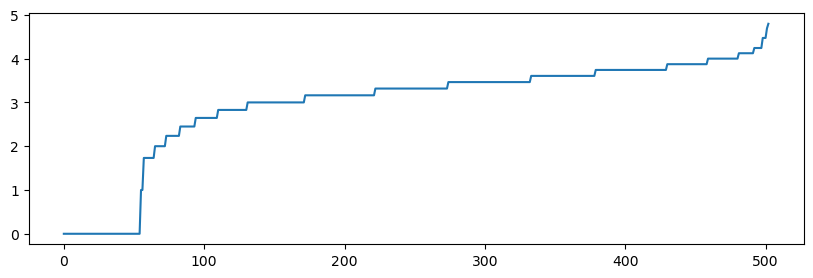

In [27]:
nn = NearestNeighbors(n_neighbors=5)
neighbors = nn.fit(X)
distances, indices = neighbors.kneighbors(X)

# print(f"distance: {distances} indices: {indices}")

plt.figure(figsize=(10,3))
plt.plot(np.sort(distances[:, 4]))
plt.xlabel = 'values'
plt.ylabel = 'epsilon'

# por observacion del grafico, es poco probable tener buenos resultados

In [28]:
# constante epsilon observado (entre 0.5)
e= .5

In [29]:
# DSCAN
db = DBSCAN(eps= e, min_samples=5)
db.fit(X)
db_pred = db.labels_
db_cluster = len(np.unique(db_pred))
db_score = silhouette_score(X, db_pred, sample_size=len(X))
print(f"Epsilon: {e} Cluster size = {db_cluster} silhouette score: {db_score}")

Epsilon: 0.5 Cluster size = 3 silhouette score: 0.30067961155855905


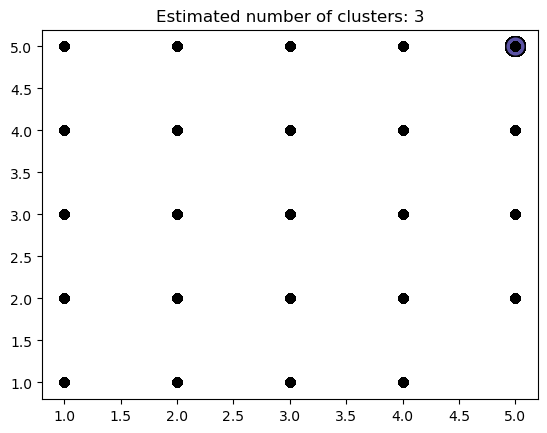

In [30]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(db_pred))]
core_samples_mask = np.zeros_like(db_pred, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
for k, col in zip(db_pred, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = db_pred == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {db_cluster}")
plt.show()

# arroja menos de 5 clusters, no hay claridad en la clasificacion

#### Affinity Propagation Marketing Position

In [31]:
for damp_val in np.arange(0.5, 1, 0.1):
    damp_val = round(damp_val, 1)
    ap = AffinityPropagation(damping=damp_val)
    ap.fit(X)
    ap_pred = ap.predict(X)
    ap_cluster = len(np.unique(ap_pred))
    ap_score = silhouette_score(X, ap_pred, sample_size=len(X))
    print(f"Damping: {damp_val}, Cluster size: {ap_cluster}, silhouette score: {ap_score}")

# arroja mas de 5 clusters

Damping: 0.5, Cluster size: 27, silhouette score: 0.17376195419611337
Damping: 0.6, Cluster size: 27, silhouette score: 0.17394710215147718
Damping: 0.7, Cluster size: 27, silhouette score: 0.17326978414888464
Damping: 0.8, Cluster size: 27, silhouette score: 0.17326978414888464
Damping: 0.9, Cluster size: 27, silhouette score: 0.17326978414888464


#### Optics con Marketing Position

In [32]:
op = OPTICS(min_samples = 5)
op.fit(X)
op_pred = cluster_optics_dbscan(reachability=op.reachability_,
                                core_distances = op.core_distances_,
                                ordering = op.ordering_,
                                eps = e)

op_cluster = len(np.unique(op_pred))
op_score = silhouette_score(X, op_pred, sample_size=len(X))

print(f"Epsilon: {e}, Cluster size: {op_cluster}, silhouette score = {op_score}")
# arroja menos de 5 clusters

Epsilon: 0.5, Cluster size: 3, silhouette score = 0.30067961155855905


c:\Users\fefys\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:992: RuntimeWarning:

divide by zero encountered in divide



**Modelo elegido para Markteing Position: K Means**

Los nuevos resultados en mkt_position con clustering se interpretan como una evolucion de los customers acorde a la informacion existente, y clarifica su posicionamiento de acuerdo al comportamiento. Se decide reemplazar los scores previos con los resultados del clustering

In [33]:
mkt_model_knmean['market_position_score'] = mkt_model_knmean['mkt_clusters']
mkt_model_knmean.drop(['mkt_clusters','y__old_mean_scores', 'market_position_desc', 'results'], axis=1, inplace=True)

mkt_no_clust = df[df['market_position_desc'].isin(mkt_tag_no_clustering)][['customer', 'market_position_score']].copy()
mkt_subset = pd.concat([mkt_model_knmean, mkt_no_clust])

df.drop('market_position_score', axis=1, inplace=True)
df = pd.merge(df, mkt_subset, how='inner', on='customer')

In [34]:
# nuevas clasificaciones
df[['market_position_desc', 'relationship_desc', 'relationship_score', 'market_position_score']].head(5)

,market_position_desc,relationship_desc,relationship_score,market_position_score
0,"Innovative & Faster Growing than Market, Niche...",Partnership,5.0,2.0
1,"Faster Growing than Market, Market Follower","Transactional, Pure Business, Partnership",3.0,3.0
2,Niche Player,Pure Business,3.0,1.0
3,"Faster Growing than Market, Niche Player","Advanced Business Ties, Pure Business",3.0,3.0
4,Innovative & Faster Growing than Market,Partnership,5.0,5.0


## Save data for model

In [35]:
# funcion para crear columns que describen calificaciones del 1 al 5
def dscore_col(df, l_desc_scores, score_col, dscore_col_name):
    """
    Es una funcion dependiente de pandas y numpy para crear una columna descriptiva relacionada a valores numericos categoricos
    
    Parametros
    --------------
    df = pd.DataFrame()
    l_desc_scores = lista: debe tener mismo len() de 4. Cada uno de los valores de la lista se usara para reemplazar valores de la columna
    score_col = pd.Serie(), lista: columna de referencia de valores entre 1 y 5, puede contener np.nan, manteniendo al integridad de informacion
    dscore_col_name = str, lista: nombre de la nueva columna que contendra las descripciones de las calificaciones
    
    Input
    --------------
    DataFrame con datos numericos categóricos
    
    Output
    --------------
    DataFrame con una columna nueva categorica de valores str
    """
    df[dscore_col_name] = df[score_col].copy()
    
    for v in df[score_col].values:
        if v < 2 and v >= 1:
            df[dscore_col_name].replace(to_replace = v, value = l_desc_scores[0], inplace=True)
        if v < 3 and v >= 2:
            df[dscore_col_name].replace(to_replace = v, value = l_desc_scores[1], inplace=True)
        if v < 4 and v >= 3:
            df[dscore_col_name].replace(to_replace = v, value = l_desc_scores[2], inplace=True)
        if v < 5 and v >= 4:
            df[dscore_col_name].replace(to_replace = v, value = l_desc_scores[3], inplace=True)
        if v == 5:
            df[dscore_col_name].replace(to_replace = v, value = l_desc_scores[4], inplace=True)
        else:
            df[dscore_col_name].replace(to_replace = v, value = np.nan, inplace=True)

    return df

In [36]:
mkt_tag = ['Niche Player', 'Market Follower', 'Faster Growing than Market', 'Innovative', 'Innovative & Faster Growing than Market']
rel_tag = ['Opportunistic', 'Transactional', 'Pure Business', 'Advanced Business Ties', 'Partnership']

df.drop(['market_position_desc', 'relationship_desc'], axis=1, inplace=True)

tags = [mkt_tag, rel_tag]
score_cols = ['market_position_score', 'relationship_score']
n_desc_cols = ['market_position_desc_new', 'relationship_desc_new']


dscore_col(df = df,
           l_desc_scores= tags[0],
           score_col= score_cols[0],
           dscore_col_name= n_desc_cols[0]
           )
dscore_col(df = df,
           l_desc_scores= tags[1],
           score_col= score_cols[1],
           dscore_col_name= n_desc_cols[1]
           ).head(3)

,customer,sales_qty_2021,sales_qty_2022,sales_qty_2023,sales_qty_2024,net_sales_2021,net_sales_2022,net_sales_2023,net_sales_2024,p2_2021,p2_2022,p2_2023,p2_2024,qty_2021_score,qty_2022_score,qty_2023_score,qty_2024_score,sales_2021_score,sales_2022_score,sales_2023_score,sales_2024_score,p2_2021_score,p2_2022_score,p2_2023_score,p2_2024_score,qty_2021_score_desc,qty_2022_score_desc,qty_2023_score_desc,qty_2024_score_desc,sales_2021_score_desc,sales_2022_score_desc,sales_2023_score_desc,sales_2024_score_desc,p2_2021_score_desc,p2_2022_score_desc,p2_2023_score_desc,p2_2024_score_desc,material_portfolio,material_portfolio_desc,brand_portfolio,brand_portfolio_desc,product_type_portfolio,product_type_portfolio_desc,material_portfolio_score,brand_portfolio_score,product_type_portfolio_score,material_portfolio_score_desc,brand_portfolio_score_desc,product_type_portfolio_score_desc,feature_tag_null,feature_tag_q1,feature_tag_q2,feature_tag_q3,feature_tag_q4,feature_tag_null_score,feature_tag_q1_score,feature_tag_q2_score,feature_tag_q3_score,feature_tag_q4_score,relationship_score,market_position_score,market_position_desc_new,relationship_desc_new
0,Customer_1005,28682071,32079526,31453752,26429101,1.695876e+09,1.833924e+09,1.900422e+09,1.595169e+09,9.462729e+08,8.847213e+08,1.072850e+09,7.123357e+08,3,4,4,2,3.0,4.0,4.0,2.0,4.0,3.0,5.0,1.0,Medium,High,High,Low,Medium,High,High,Low,High,Medium,Strategic,Neglectable,4,"MAT000810, MAT002520, MAT000318, MAT000834",4,"Brand_2805, Brand_5892, Brand_3658, Brand_5729",4,"Product_Type_1283, Product_Type_317, Product_T...",2,2,2,several,several,several,40,13,16,10,15,1,3,1,2,1,5.0,2.0,Market Follower,Partnership
1,Customer_1011,26662722,26804515,28793437,24591574,1.362151e+09,1.531981e+09,1.890697e+09,1.581387e+09,5.740576e+08,7.805375e+08,1.046884e+09,7.476680e+08,2,2,3,1,1.0,2.0,4.0,2.0,1.0,2.0,4.0,2.0,Low,Low,Medium,Neglectable,Neglectable,Low,High,Low,Neglectable,Low,High,Low,4,"MAT000256, MAT000812, MAT001174, MAT000449",4,"Brand_396, Brand_6463, Brand_707, Brand_1399",4,"Product_Type_676, Product_Type_1252, Product_T...",2,2,2,several,several,several,46,13,16,12,9,2,3,1,3,1,3.0,3.0,Faster Growing than Market,Pure Business
2,Customer_1023,18573979,25156206,26389512,29153877,1.089888e+09,1.478579e+09,1.669236e+09,1.651936e+09,5.051393e+08,8.404226e+08,6.137710e+08,8.069199e+08,1,2,2,3,1.0,2.0,3.0,2.0,1.0,3.0,1.0,2.0,Neglectable,Low,Low,Medium,Neglectable,Low,Medium,Low,Neglectable,Medium,Neglectable,Low,4,"MAT001921, MAT002068, MAT002926, MAT001675",4,"Brand_7539, Brand_7706, Brand_2936, Brand_5802",4,"Product_Type_649, Product_Type_776, Product_Ty...",2,2,2,several,several,several,45,17,10,9,8,2,1,2,1,1,3.0,1.0,Niche Player,Pure Business


In [37]:
#df.to_csv("omya/sources/model_data.csv", index=False)

Next, 5_omya_model